# Lesson 1: We Why Code
<br />
There are many reasons to code. You might have a machine or device that you want to automate or remotely control. You might have a simulation of some real-world situation to run. Or you may simply want to make a game or app for your smartphone.

Our reason is simple. It saves us **time**. It takes a lot of work to go from the raw information spewed out from our experimental equipment to meaningful scientific results. Computers can help us with this; spreadsheet packages, for example, like [Excel](https://en.wikipedia.org/wiki/Microsoft_Excel) can help. You may well have used these at school already. But what we want to show you in this first lesson is how coding can save you time even compared to using an Excel spreadsheet. After all, the less time we spend preparing, processing, and managing our data, the more time we can spend analysing - i.e. _extracting scientific meaning from_ - our data. And that's a **Good Thing**.

Let's look at an example. A little while back we took a radiation measurement using a CERN@school detector placed above one of William Crookes' notebooks at the Royal Institution of Great Britain. Amongst other things, Crookes discovered thallium - and his notebooks from the time are radioactive! Here's the experimental setup...

<img src='./assets/images/ri_crookes_notebook_setup.jpg' style='width: 256px' />
<p style='text-align:center;'><em>Figure 1: A CERN@school MX-10 detector (left) mounted above one of William Crookes' notebooks at the Royal Institution of Great Britain. You can also see a Geiger counter to the right</em>.</p>

...and here's some data from the measurements that were taken:

* <a href='https://dx.doi.org/10.6084/m9.figshare.3484946.v1' target='_blank'>The raw data</a>;
* <a href='https://dx.doi.org/10.6084/m9.figshare.3485000.v1' target='_blank'>The metadata</a>.

Here, the **raw data** is the position (`x` and `y`) and count value (`C`, corresponding to the energy) measured by the 'hit' pixels in the detector. The **metadata** - the _data about the data_ - is a file containing the detector settings at the time the measurement was taken. You can download both to your `Downloads` folder by clicking on the links above and then clicking on the **Download** button on the file's [FigShare](http://figshare.com) page.

You can open both files in a **text editor** like Notepad (Windows), TextEdit (Mac), or Mousepad (Linux), but the raw data can be imported into a spreadsheet by:

* **Excel** (Windows/Mac): From the _File_ menu select _Import..._ and then select the **Text file** option. Then choose **Delimited** - the values are separated by tabs - then click _Next_. Then tick **Tab** as the delimiter and click _Next_, and then click on the _Finish_ button;
* **LibreOffice Calc** (Linux): From the _File_ menu select _Open_. Find the `data000.txt` file in the dialog box and select it. The **Text import** dialog should then appear; click **OK** to accept the default options.

You should then be presented with a spreadsheet that has three columns of values. As you can see, a lot of pixels were hit in this single frame - it was only recording for a second - but other than that it's difficult to know what's going on. And, you know, it looks a little dull.

### Exercise 1: Data analysis with a spreadsheet

_Using your spreadsheet skills, can you_:

1. _Add the `x`, `y`, and `C` column headings to help others understand what the data means?_
1. _Work out how many pixels were hit in this frame of data?_
1. _Find the location of the pixel with the greatest recorded energy? (i.e. highest count value)_
1. _Make a scatter plot of the pixel `x` values against the pixel `y` values to make a map of the pixels?_


## An alternative approach: Python
So what can we do with coding? Well, let's start with the things we've just done with our spreadsheet. We'll work in the Jupyter Notebook environment so you can see what happens at each step.
<br />
<div class="alert alert-info" role="alert">
Don't worry <em>too much</em> about what all of this means for the moment - we'll cover it all in more detail later. For now, just enjoy how much <em>quicker</em> everything is when you code...
</div>
First, let's get hold of the tools we'll need. The line below will import the [`pandas`](http://pandas.pydata.org/) suite of Python data analysis tools so they're ready for us to use.

In [1]:
import pandas as pd

Now let's open the raw data file. Rather than faff about with another application, we can load up the file with a single line of code like so:

In [2]:
my_data = pd.read_table('/home/gridpp/Downloads/data000.txt', header=None)

The variable `my_data` now contains the raw data in a table that we can play with. For example, we can look at the first three rows, i.e. the first three pixels, in the table:

In [3]:
my_data[0:3]

,0,1,2
0,24,9,60
1,25,9,27
2,24,10,47


So, as you'll have seen when you opened the same file in your spreadsheet, the first pixel is at (24,9) and has a count value `C` of 60.

Let's add some headings to the columns as per _Ex 1.1_. Again, we can do this with a single line of code:

In [4]:
my_data.columns = ["x", "y", "C"]

That's better:

In [5]:
my_data[0:3]

,x,y,C
0,24,9,60
1,25,9,27
2,24,10,47


The total number of rows? (_Ex 1.2_) No problem - let's use the `len` function to get the length of (number of rows in) the table:

In [6]:
len(my_data.index)

735

So what about the pixel (row) with the greatest count value? Again, we can do this in a single line:

In [7]:
my_data.ix[my_data['C'].idxmax()]

x     62
y    250
C    639
Name: 663, dtype: int64

OK, this is a little more obscure - the `ix` and `idx` are short for "index" - but the code has picked out that pixel `663` at position (62, 250) has the highest count value of 639.

To make the scatter plot (_Ex. 1.4_), we'll need to import some more tools:

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

We can make a simple scatter plot with the following line of code:

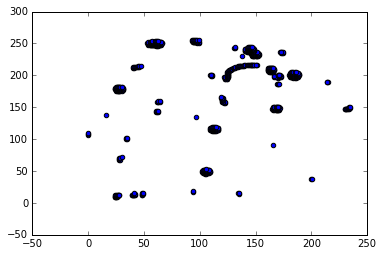

In [9]:
plt.scatter(my_data.x, my_data.y)

This should look like the scatter plot that you'll have made with your spreadsheet. (_You did do Ex 1.4, right?_) We can _start_ to make out structures in the data - bigger groups of pixels indicating larger, more energetic particles being measured by our detector, and even a longer particle track. But with a custom-written bit of code - in the form of the `make_frame_image` _function_ - we can do much, much better:

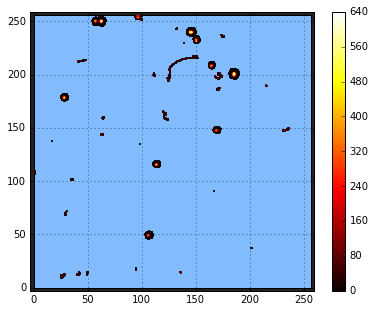

In [10]:
# Import the make_frame_image function.
from cernatschool.helpers import make_frame_image

# Use it to plot the count values at their corresponding (x,y) positions.
make_frame_image(my_data.x, my_data.y, my_data.C)

Now we can really start to see what's going on. This 256 x 256 pixel image represents what was hitting the 14mm x 14mm square of silicon wafer during the second that the detector was on. The colour scale - which is based on the count value recorded by each pixel - is shown to the right of the figure. You should be able to see:

* Big multi-coloured blobs: these are &alpha; particles - helium nuclei with large mass and a charge of 2+. These leave big blobs of charge. Note the change in colour towards the centre of the blobs;
* Smaller, curly, continuous tracks of pixels: these are left by &beta; radiation - electrons and positrons - hitting the silicon and bouncing about within in. Their relatively low energy means the count values recorded are small compared to the alphas, so they appear a bit dark on the figure;
* Small groups of 1-4 pixels represent photons - &gamma; radiation - hitting the detector.

So with a bit of code (and, to be fair, some pre-written functions) we can turn our seemingly inconspicuous table of numbers into something rather useful in just a few lines. As we'll see, however, where code _really_ comes into its own is when we have a lot of data to process. Imagine having to make a spreadsheet for one hundred frames of detector data - and then a scatter plot for each. With things like `for` loops we can run the same line of code over many data files automatically. With `if` statements we can start to place conditions on data to see if it's what we'd consider interesting (believe it or not, not all data is interesting) before we even look at it. And with the extensive plotting functionality of various Python libraries such as `matplotlib` and `pandas`, we can make beautiful, publication-standard graphs of things like particle size to help us understand our data. All much, much quicker than doing it by hand.

**That is why we code.**

So - let's get coding with CERN@school!